In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import random

df = pd.read_csv('loan_data.csv')

print(f"\nРазмер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
np.random.seed(42)
indices_to_replace = np.random.choice(len(df), size=666, replace=False)
df.loc[indices_to_replace, 'previous_loan_defaults_on_file'] = np.nan
np.random.seed(41)
indices_to_replace = np.random.choice(len(df), size=576, replace=False)
df.loc[indices_to_replace, 'person_education'] = np.nan
rows_to_duplicate = []
for idx in range(2, 15):
    row = df.loc[idx].copy()
    rows_to_duplicate.append(row)
duplicates_df = pd.DataFrame(rows_to_duplicate)
df = pd.concat([df, duplicates_df], ignore_index=False)


display(df.head(21))


Размер датасета: 45000 строк, 14 столбцов


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,NaN,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [ ]:
print("Типы данных:")
print(df.dtypes)

Типы данных:
person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object


In [ ]:
df = df.replace('?', np.nan)
print("Количество пропущенных значений по столбцам:")
print(df.isnull().sum())
print("\nПроцент пропущенных значений:")
print((df.isnull().sum() / len(df)) * 100)


Количество пропущенных значений по столбцам:
person_age                          0
person_gender                       0
person_education                  576
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                           0
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file    667
loan_status                         0
dtype: int64

Процент пропущенных значений:
person_age                        0.000000
person_gender                     0.000000
person_education                  1.279630
person_income                     0.000000
person_emp_exp                    0.000000
person_home_ownership             0.000000
loan_amnt                         0.000000
loan_intent                       0.000000
loan_int_rate                     0

In [ ]:
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")


Количество полных дубликатов строк: 13


/tmp/ipython-input-514777548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set1')


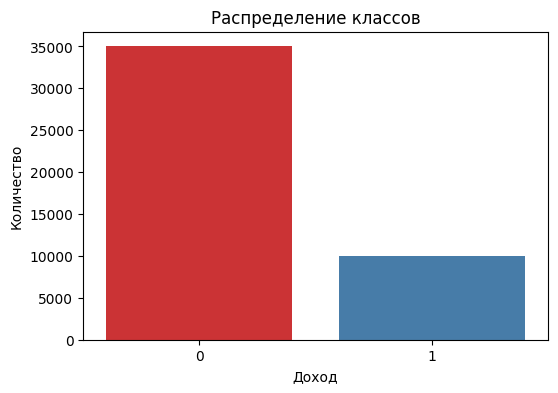

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='loan_status', palette='Set1')
plt.title('Распределение классов')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()


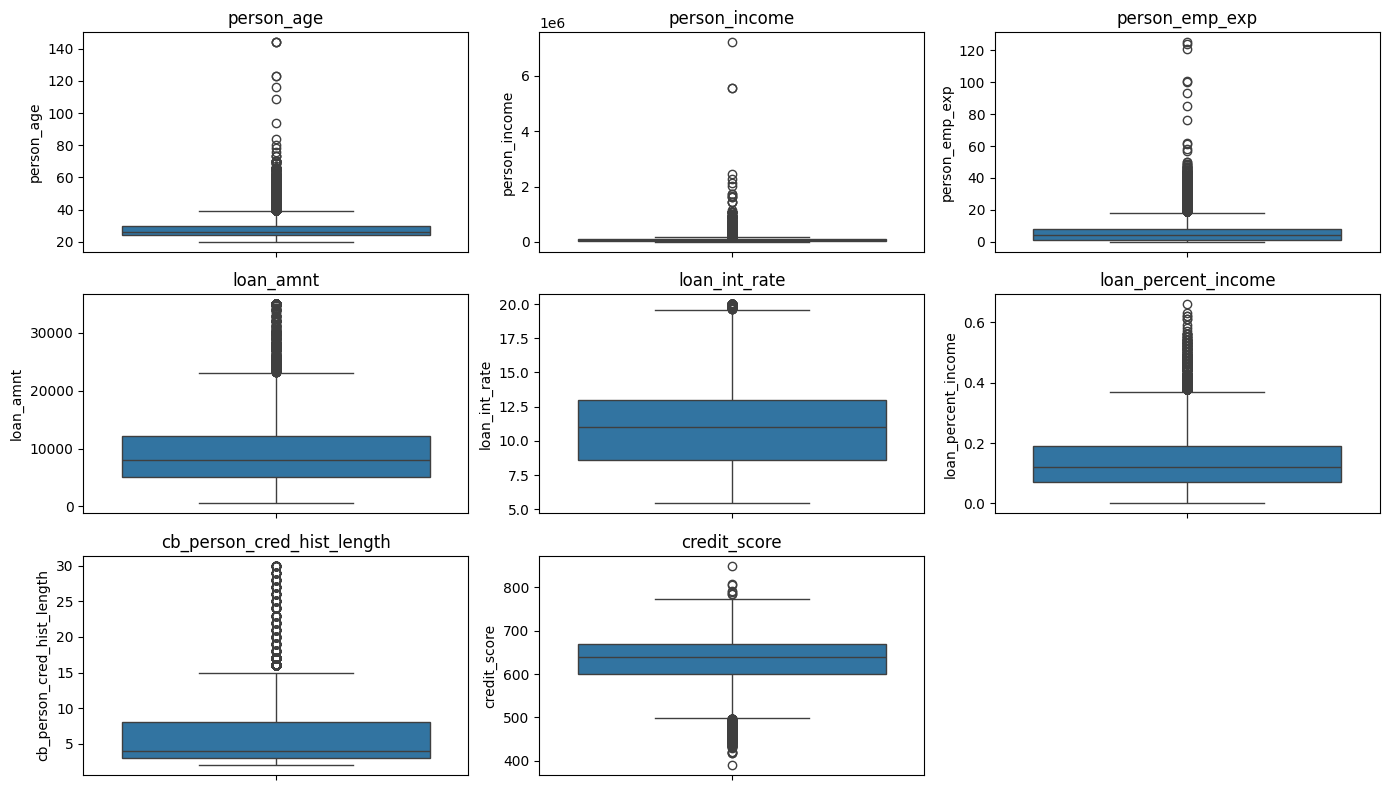

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns.drop('loan_status')
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
df = df.dropna()
print("Пропуски после удаления:")
print(df.isnull().sum())


Пропуски после удаления:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

feature_cols = [col for col in df.columns if col != 'loan_status']
target_col = 'loan_status'
cat_features = [col for col in feature_cols if df[col].dtype == 'object']
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(df[cat_features])
encoded_feature_names = encoder.get_feature_names_out(cat_features)
encoded_df = pd.DataFrame(encoded_cat, columns=encoded_feature_names, index=df.index)
df_numeric = df.drop(columns=cat_features)
df_processed = pd.concat([df_numeric, encoded_df], axis=1)

print(f"Размер после кодирования: {df_processed.shape}")
print(f"Количество признаков: {df_processed.shape[1] - 1}")

Размер после кодирования: (43779, 23)
Количество признаков: 22


In [ ]:
from sklearn.preprocessing import StandardScaler

print("Числовые признаки для масштабирования:", *numeric_cols)
scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])
print("Числовые признаки после масштабирования (первые 5 строк):")
display(df_processed[numeric_cols].head())


Числовые признаки для масштабирования: person_age person_income person_emp_exp loan_amnt loan_int_rate loan_percent_income cb_person_cred_hist_length credit_score
Числовые признаки после масштабирования (первые 5 строк):


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,-0.953885,-0.103641,-0.891972,4.016311,1.683203,4.009667,-0.739322,-1.419243
1,-1.119574,-0.838956,-0.891972,-1.358198,0.045870,-0.685711,-0.997598,-2.548484
2,-0.456817,-0.837034,-0.396598,-0.646866,0.626318,3.437060,-0.739322,0.046790
3,-0.788196,-0.007453,-0.891972,4.016311,1.418143,3.437060,-0.997598,0.839240
5,-1.119574,-0.830711,-0.891972,-1.121087,-1.296206,0.574025,-0.997598,-1.993769


In [ ]:
from sklearn.model_selection import train_test_split

X = df_processed.drop(columns=['loan_status'])
y = df_processed['loan_status']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")
print(f"Доля класса 1 в train: {y_train.mean():.3f}")
print(f"Доля класса 1 в test: {y_test.mean():.3f}")


Размер обучающей выборки: 35023 строк
Размер тестовой выборки: 8756 строк
Доля класса 1 в train: 0.222
Доля класса 1 в test: 0.222


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
models = {
    'Logistic_Regression_None': LogisticRegression(
        penalty=None,
        max_iter=1000,
        random_state=42,
        solver='lbfgs'
    ),
    'Logistic_Regression_L1': LogisticRegression(
        penalty='l1',
        max_iter=1000,
        random_state=42,
        solver='liblinear'
    ),
    'Logistic_Regression_L2': LogisticRegression(
        penalty='l2',
        max_iter=1000,
        random_state=42,
        solver='lbfgs'
    )}
grid_searches = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Настройка модели: {name}")
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=cv,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )
    grid.fit(X_train, y_train)
    grid_searches[name] = grid
    print(f"Лучший C: {grid.best_params_['C']}, Лучший F1: {grid.best_score_:.4f}\n")


Настройка модели: Logistic_Regression_None


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Лучший C: 0.001, Лучший F1: 0.7622

Настройка модели: Logistic_Regression_L1
Лучший C: 10, Лучший F1: 0.7622

Настройка модели: Logistic_Regression_L2
Лучший C: 10, Лучший F1: 0.7623



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

results = {}
for name, grid in grid_searches.items():
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    results[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'best_C': grid.best_params_['C']
    }
    print(f"=== {name} ===")
    print(f"Лучший C: {grid.best_params_['C']}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"F1-macro: {f1_macro:.4f}")
    print(f"F1-weighted: {f1_weighted:.4f}")
    print("-" * 40)


=== Logistic_Regression_None ===
Лучший C: 0.001
Accuracy: 0.8987
Precision: 0.7948
Recall: 0.7330
F1-score: 0.7626
F1-macro: 0.8491
F1-weighted: 0.8972
----------------------------------------
=== Logistic_Regression_L1 ===
Лучший C: 10
Accuracy: 0.8982
Precision: 0.7933
Recall: 0.7325
F1-score: 0.7617
F1-macro: 0.8485
F1-weighted: 0.8968
----------------------------------------
=== Logistic_Regression_L2 ===
Лучший C: 10
Accuracy: 0.8985
Precision: 0.7942
Recall: 0.7325
F1-score: 0.7621
F1-macro: 0.8488
F1-weighted: 0.8970
----------------------------------------


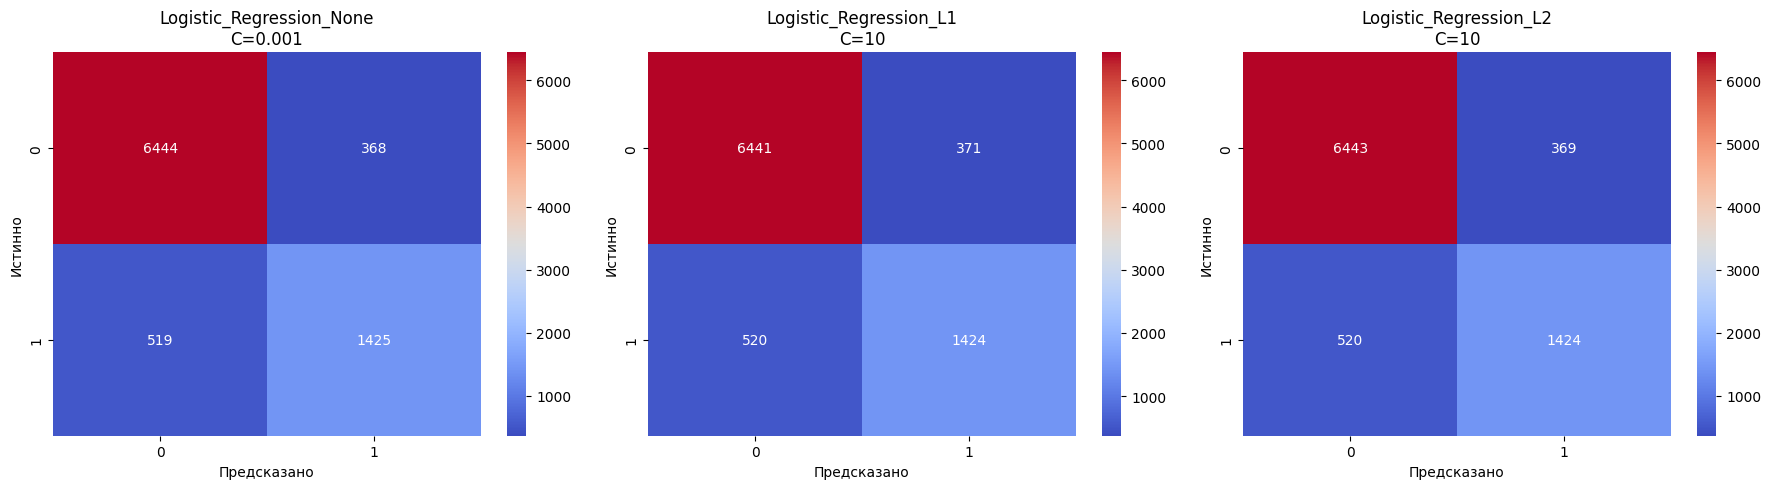

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, grid) in enumerate(grid_searches.items()):
    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=axes[idx])
    axes[idx].set_title(f'{name}\nC={grid.best_params_["C"]}')
    axes[idx].set_xlabel('Предсказано')
    axes[idx].set_ylabel('Истинно')

plt.tight_layout()
plt.show()


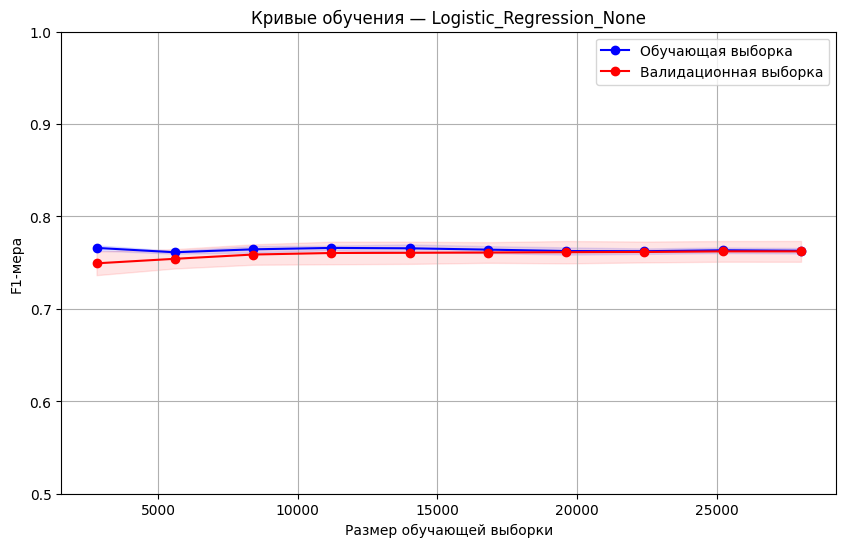

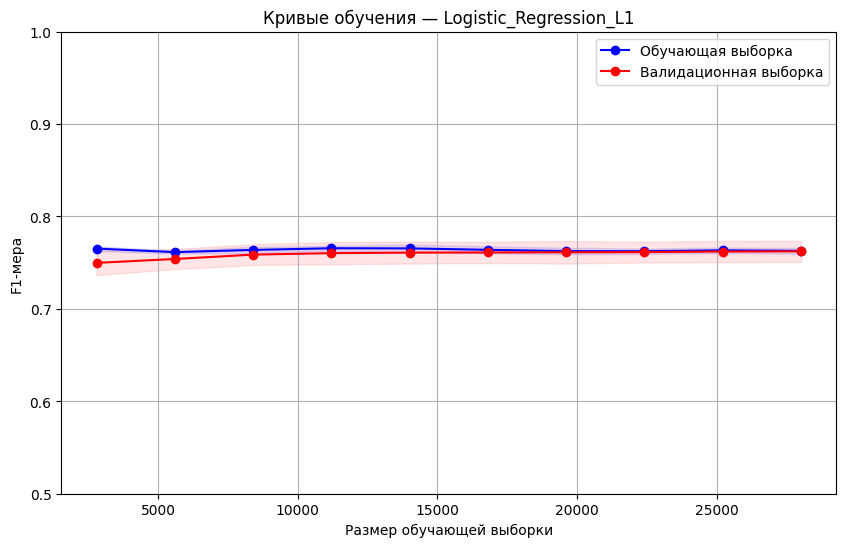

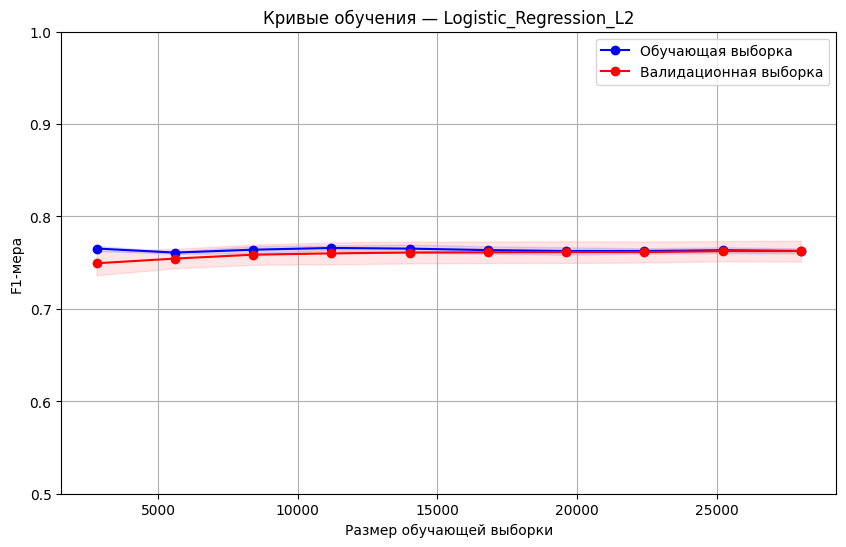

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1',
        n_jobs=-1,
        random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Обучающая выборка')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Валидационная выборка')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    plt.title(f'Кривые обучения — {title}')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('F1-мера')
    plt.legend()
    plt.grid(True)
    plt.ylim(0.5, 1.0)
    plt.show()

for name, grid in grid_searches.items():
    plot_learning_curve(grid.best_estimator_, X_train, y_train, name)


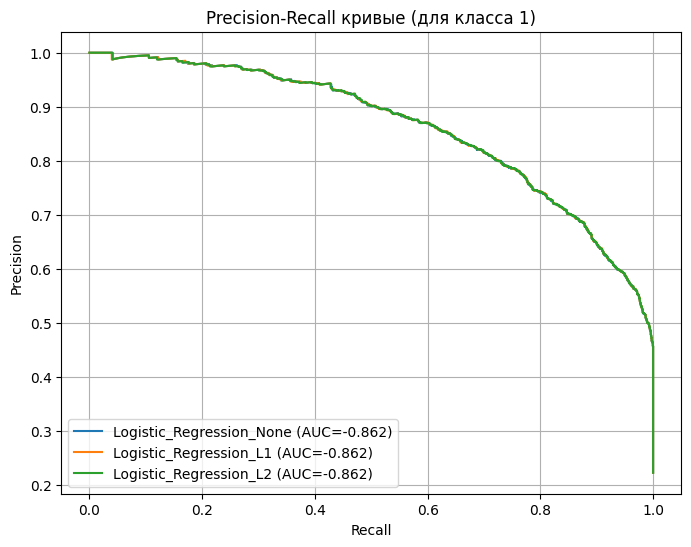

In [ ]:
from sklearn.metrics import precision_recall_curve

fig, ax = plt.subplots(figsize=(8, 6))
for name, grid in grid_searches.items():
    y_proba = grid.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    ax.plot(recall, precision, label=f'{name} (AUC={np.trapezoid(precision, recall):.3f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall кривые (для класса 1)')
ax.legend()
ax.grid(True)
plt.show()


In [ ]:
l1_model = grid_searches['Logistic_Regression_L1'].best_estimator_
coefficients = l1_model.coef_[0]
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values(by='coefficient', key=abs, ascending=False)
zero_features = coef_df[abs(coef_df['coefficient']) < 1e-6]['feature'].tolist()
print(f"Количество занулённых признаков: {len(zero_features)}")
print(f"\nПримеры занулённых признаков: {zero_features[:10]}")

Количество занулённых признаков: 0

Примеры занулённых признаков: []


In [ ]:
print("Текущее распределение классов в train:")
print(y_train.value_counts())
print(f"Доля класса 1: {y_train.mean():.3f}")

Текущее распределение классов в train:
loan_status
0    27247
1     7776
Name: count, dtype: int64
Доля класса 1: 0.222


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Стандартная Логистическая Регрессия
model_baseline = LogisticRegression(
    penalty=None,
    C=0.001,
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)
model_baseline.fit(X_train, y_train)
y_pred_baseline = model_baseline.predict(X_test)
y_proba_baseline = model_baseline.predict_proba(X_test)[:, 1]

# class_weight='balanced'
model_balanced = LogisticRegression(
    penalty=None,
    C=0.001,
    max_iter=1000,
    random_state=42,
    solver='lbfgs',
    class_weight='balanced'
)
model_balanced.fit(X_train, y_train)
y_pred_balanced = model_balanced.predict(X_test)
y_proba_balanced = model_balanced.predict_proba(X_test)[:, 1]

# SMOTE + LR
pipeline_smote = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression(
        penalty=None,
        C=0.001,
        max_iter=1000,
        random_state=42,
        solver='lbfgs'
    ))
])
pipeline_smote.fit(X_train, y_train)
y_pred_smote = pipeline_smote.predict(X_test)
y_proba_smote = pipeline_smote.predict_proba(X_test)[:, 1]

# RandomUnderSampler + LR
pipeline_under = ImbPipeline([
    ('under', RandomUnderSampler(random_state=42)),
    ('lr', LogisticRegression(
        penalty=None,
        C=0.001,
        max_iter=1000,
        random_state=42,
        solver='lbfgs'
    ))
])
pipeline_under.fit(X_train, y_train)
y_pred_under = pipeline_under.predict(X_test)
y_proba_under = pipeline_under.predict_proba(X_test)[:, 1]

models = {
    'Baseline (No balance)': (y_pred_baseline, y_proba_baseline),
    'class_weight=balanced': (y_pred_balanced, y_proba_balanced),
    'SMOTE + LR': (y_pred_smote, y_proba_smote),
    'UnderSampler + LR': (y_pred_under, y_proba_under)
}

results_balance = {}

for name, (y_pred, y_proba) in models.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    results_balance[name] = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'auc': auc_score
    }

results_balance_df = pd.DataFrame(results_balance).T.round(4)
print("Сравнение моделей")
display(results_balance_df)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Сравнение моделей


,accuracy,precision,recall,f1,auc
Baseline (No balance),0.8987,0.7948,0.7330,0.7626,0.9558
class_weight=balanced,0.8576,0.6210,0.9203,0.7416,0.9558
SMOTE + LR,0.8626,0.6314,0.9156,0.7474,0.9558
UnderSampler + LR,0.8578,0.6212,0.9213,0.7421,0.9558


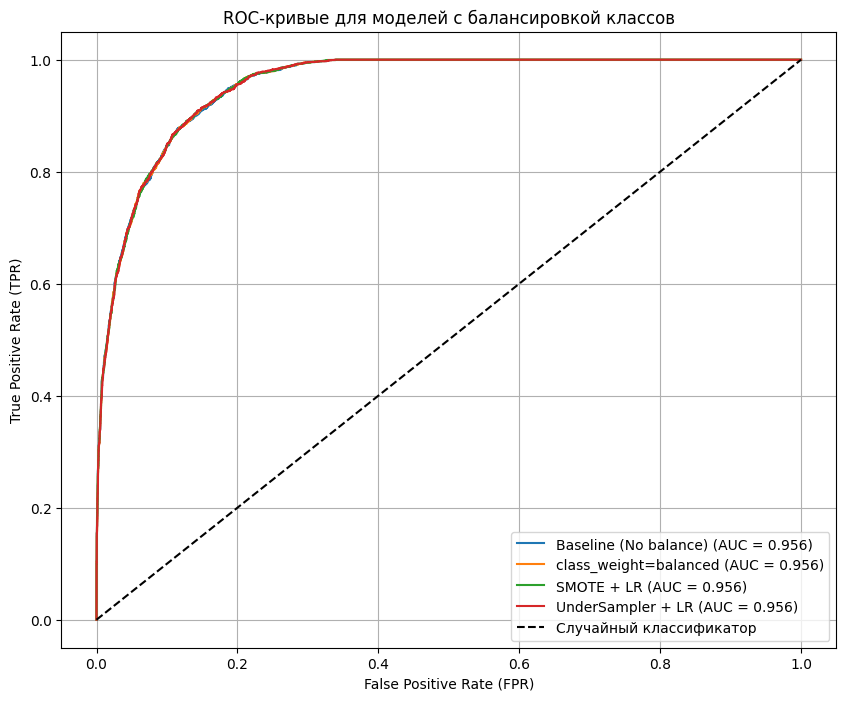

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

for name, (_, y_proba) in models.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривые для моделей с балансировкой классов')
plt.legend()
plt.grid(True)
plt.show()

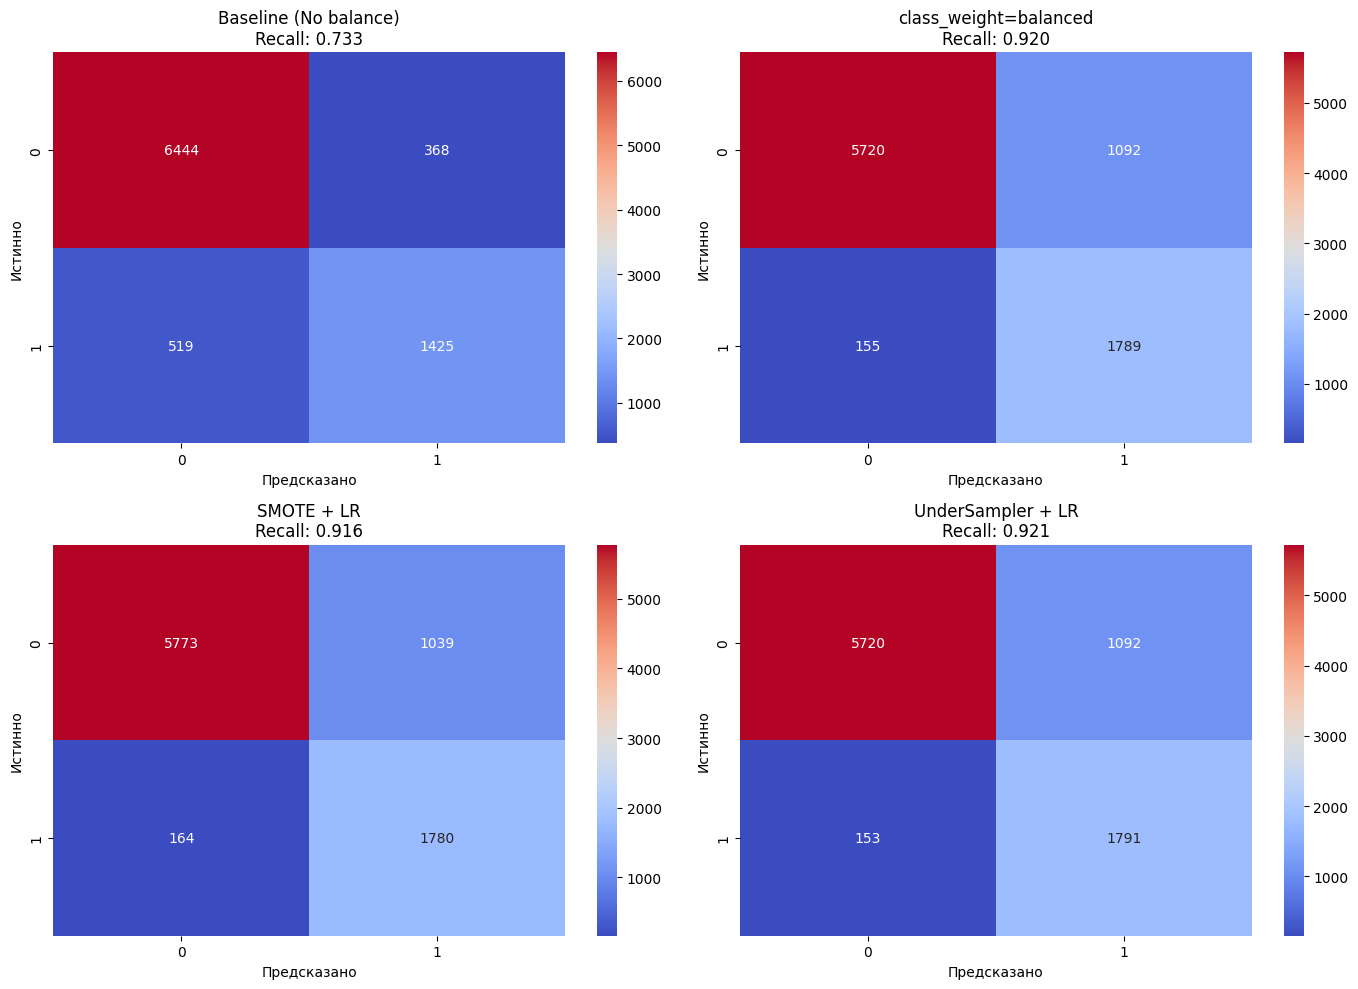

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, (name, (y_pred, _)) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', ax=axes[idx])
    axes[idx].set_title(f'{name}\nRecall: {recall_score(y_test, y_pred):.3f}')
    axes[idx].set_xlabel('Предсказано')
    axes[idx].set_ylabel('Истинно')

plt.tight_layout()
plt.show()


In [ ]:
baseline_cm = confusion_matrix(y_test, y_pred_baseline)
tn, fp, fn, tp = baseline_cm.ravel()

print(f"Baseline (No balance):")
print(f"  TP: {tp}\n  FP: {fp}\n  FN: {fn}\n  TN: {tn}")

for name, (y_pred, _) in list(models.items())[1:]:
    cm = confusion_matrix(y_test, y_pred)
    tn2, fp2, fn2, tp2 = cm.ravel()
    print(f"\n{name}:")
    print(f"  TP: {tp2} (+{tp2-tp})")
    print(f"  FP: {fp2} (+{fp2-fp})")
    print(f"  FN: {fn2} (-{fn-fn2})")
    print(f"  Recall ↑: {recall_score(y_test, y_pred) - recall_score(y_test, y_pred_baseline):.3f}")


Baseline (No balance):
  TP: 1425
  FP: 368
  FN: 519
  TN: 6444

class_weight=balanced:
  TP: 1789 (+364)
  FP: 1092 (+724)
  FN: 155 (-364)
  Recall ↑: 0.187

SMOTE + LR:
  TP: 1780 (+355)
  FP: 1039 (+671)
  FN: 164 (-355)
  Recall ↑: 0.183

UnderSampler + LR:
  TP: 1791 (+366)
  FP: 1092 (+724)
  FN: 153 (-366)
  Recall ↑: 0.188


In [ ]:
print(df['person_education'].unique())

['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [ ]:
top_education_levels = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']
df_5class = df[df['person_education'].isin(top_education_levels)].copy()

print("Распределение целевой переменной:")
print(df_5class['person_education'].value_counts())

df_5class = df_5class.drop(columns=['loan_status'])
y_5class = df_5class['person_education']
X_5class = df_5class.drop(columns=['person_education'])


Распределение целевой переменной:
person_education
Bachelor       13059
Associate      11699
High School    11623
Master          6796
Doctorate        602
Name: count, dtype: int64


In [ ]:
categorical_cols = X_5class.select_dtypes(include=['object']).columns.tolist()
numeric_cols = X_5class.select_dtypes(include=['number']).columns.tolist()

print("Категориальные признаки:", categorical_cols)
print("Числовые признаки:", numeric_cols)
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoded_cat = encoder.fit_transform(X_5class[categorical_cols])

encoded_feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_cat, columns=encoded_feature_names, index=X_5class.index)

X_5class_numeric = X_5class.drop(columns=categorical_cols)

X_5class_processed = pd.concat([X_5class_numeric, encoded_df], axis=1)

print(f"Общее количество признаков после кодирования: {X_5class_processed.shape[1]}")

Категориальные признаки: ['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Числовые признаки: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']
Общее количество признаков после кодирования: 18


In [ ]:
scaler = StandardScaler()
X_5class_processed[numeric_cols] = scaler.fit_transform(X_5class_processed[numeric_cols])

In [ ]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
    X_5class_processed, y_5class,
    test_size=0.2,
    random_state=42,
    stratify=y_5class
)

print(f"Train: {X_train_5.shape[0]} строк")
print(f"Test: {X_test_5.shape[0]} строк")

Train: 35023 строк
Test: 8756 строк


In [ ]:
lr_ovr_builtin = LogisticRegression(
    multi_class='ovr',
    solver='liblinear',
    max_iter=1000,
    random_state=42,
    C=1.0
)

param_grid_lr = {
    'C': np.linspace(0.1, 10, 5)
}

grid_lr = GridSearchCV(
    lr_ovr_builtin,
    param_grid_lr,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

grid_lr.fit(X_train_5, y_train_5)
print(f"Лучший C: {grid_lr.best_params_['C']}\n")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Лучший C: 0.1



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [5, 7, 11, 15]}
grid_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

print("Обучение k-Nearest Neighbors...")
grid_knn.fit(X_train_5, y_train_5)
print(f"Лучший n_neighbors: {grid_knn.best_params_['n_neighbors']}\n")


Обучение k-Nearest Neighbors...
Лучший n_neighbors: 15



In [ ]:
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV

svm_ovr = SVC(
    kernel='linear',
    probability=True,
    random_state=42
)

param_grid_svm = {'C': [1, 10], 'gamma': [0.01]}

X_train_sample, y_train_sample = resample(
    X_train_5, y_train_5,
    n_samples=int(len(X_train_5) * 0.1),
    random_state=42,
    stratify=y_train_5
)

print("Быстрый подбор параметров SVM на подвыборке...")
random_search = RandomizedSearchCV(
    svm_ovr,
    param_distributions=param_grid_svm,
    n_iter=8,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search.fit(X_train_sample, y_train_sample)
best_params_svm = random_search.best_params_
print(f"Лучшие параметры SVM: {best_params_svm}")

final_svm = SVC(
    kernel='linear',
    probability=True,
    random_state=42,
    **best_params_svm
)
print("Обучение финальной SVM на полных данных...")
final_svm.fit(X_train_5, y_train_5)
# Создаём "grid" для совместимости с остальными моделями
grid_svm = final_svm

Быстрый подбор параметров SVM на подвыборке...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=8. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшие параметры SVM: {'gamma': 0.01, 'C': 1}
Обучение финальной SVM на полных данных...


In [ ]:
models = {
    'Logistic Regression (OvR)': grid_lr,
    'k-Nearest Neighbors': grid_knn,
    'SVM (OvR, RBF)': grid_svm}
results_multiclass = {}
for name, model in models.items():
    y_pred = model.predict(X_test_5)
    acc = accuracy_score(y_test_5, y_pred)
    f1_w = f1_score(y_test_5, y_pred, average='weighted')
    f1_macro = f1_score(y_test_5, y_pred, average='macro')
    f1_micro = f1_score(y_test_5, y_pred, average='micro')
    results_multiclass[name] = {
        'accuracy': acc,
        'f1_weighted': f1_w,
        'f1_macro': f1_macro,
        'f1_micro': f1_micro,
        'best_params': model.best_params_ if hasattr(model, 'best_params_') else 'N/A'
    }
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-weighted: {f1_w:.4f}")
    print(f"F1-macro: {f1_macro:.4f}")
    if hasattr(model, 'best_params_'):
        print(f"Best params: {model.best_params_}")



=== Logistic Regression (OvR) ===
Accuracy: 0.3336
F1-weighted: 0.2756
F1-macro: 0.1963
Best params: {'C': np.float64(0.1)}

=== k-Nearest Neighbors ===
Accuracy: 0.2985
F1-weighted: 0.2825
F1-macro: 0.2147
Best params: {'n_neighbors': 15}

=== SVM (OvR, RBF) ===
Accuracy: 0.3303
F1-weighted: 0.2673
F1-macro: 0.1900


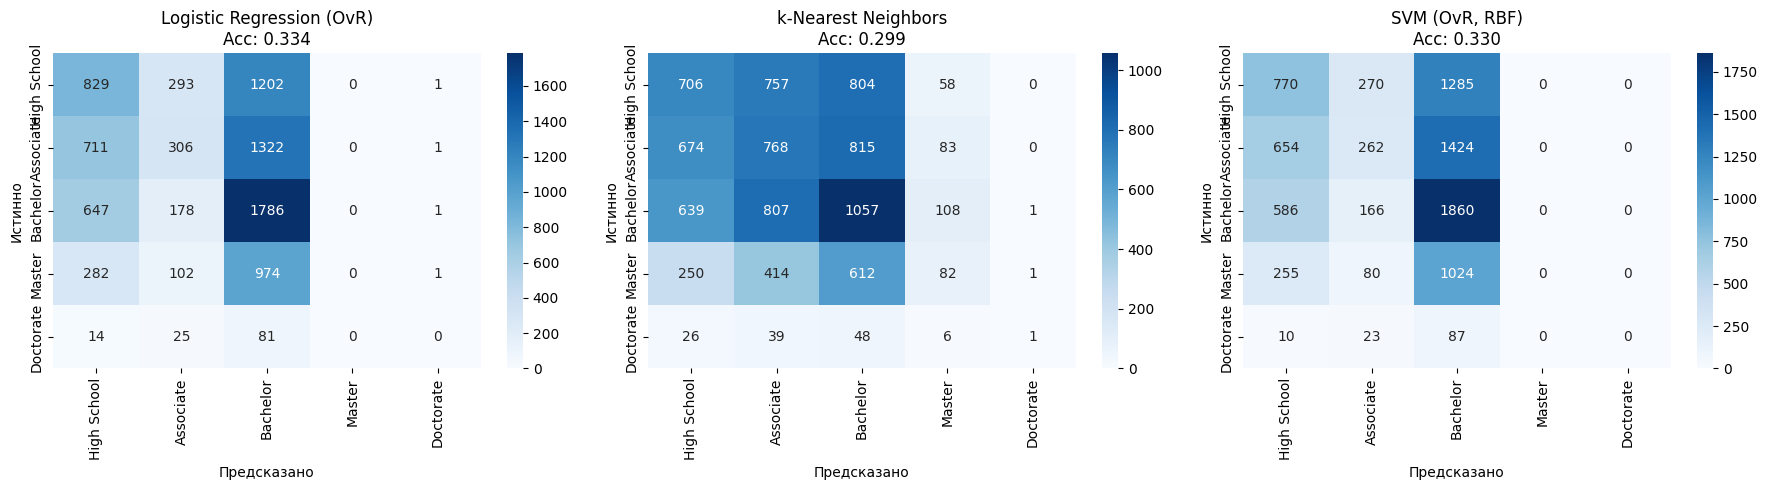

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_5)
    cm = confusion_matrix(y_test_5, y_pred, labels=top_education_levels)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=top_education_levels, yticklabels=top_education_levels)
    axes[idx].set_title(f'{name}\nAcc: {accuracy_score(y_test_5, y_pred):.3f}')
    axes[idx].set_xlabel('Предсказано')
    axes[idx].set_ylabel('Истинно')

plt.tight_layout()
plt.show()


In [ ]:
import time
for name, model in models.items():
    start = time.time()
    model.fit(X_train_5, y_train_5)
    end = time.time()
    print(f"{name}: {end - start:.2f} секунд")

In [ ]:
results_df = pd.DataFrame(results_multiclass).T
results_df = results_df[['accuracy', 'f1_weighted', 'f1_macro', 'f1_micro', 'best_params']]
results_df = results_df.round(4)

print("\n=== СРАВНЕНИЕ МОДЕЛЕЙ (МНОГОКЛАССОВАЯ КЛАССИФИКАЦИЯ) ===")
display(results_df)



=== СРАВНЕНИЕ МОДЕЛЕЙ (МНОГОКЛАССОВАЯ КЛАССИФИКАЦИЯ) ===


,accuracy,f1_weighted,f1_macro,f1_micro,best_params
Logistic Regression (OvR),0.3336,0.275563,0.196257,0.3336,{'C': 0.1}
k-Nearest Neighbors,0.298538,0.282504,0.214741,0.298538,{'n_neighbors': 15}
"SVM (OvR, RBF)",0.330288,0.267308,0.190047,0.330288,N/A
